In [2]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [6]:
penguins['sex'] = penguins['sex'].fillna(value='Male')

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [8]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [9]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3,
                                                stratify=penguins['species'],
                                                random_state=42)

print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


flipper length en body mass hebben veel correlatie

In [10]:
from sklearn.tree import DecisionTreeRegressor

features = ['flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth=3) # increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [11]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception('The amount of predictions did not equal the amount of actuals.')
        
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [12]:
predictionsOnTrainSet = dt_regression.predict(penguins_train[features])
predictionsOnTestSet = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainSet, penguins_train['body_mass_g'])
rmseTest = calculate_rmse(predictionsOnTestSet, penguins_test['body_mass_g'])

print('RMSE on training set ' + str(rmseTrain))
print('RMSE on test set ' + str(rmseTest))

RMSE on training set 385.7037576357823
RMSE on test set 340.3536605027887


Je ziet hier dat de training dataset meer RMSE heeft(root-mean-square error). De waardes zijn verwacht sinds de bodymass gemiddeld rond 3500 zit.

In [1]:
from sklearn import tree

def plot_tree_regression(model, features):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(697.5, 1189.125, 'flipper_length_mm <= 206.5\nmse = 637280.729\nsamples = 240\nvalue = 4233.549'),
 Text(348.75, 849.375, 'flipper_length_mm <= 193.5\nmse = 208756.29\nsamples = 148\nvalue = 3738.188'),
 Text(174.375, 509.625, 'flipper_length_mm <= 179.5\nmse = 163366.139\nsamples = 91\nvalue = 3572.527'),
 Text(87.1875, 169.875, 'mse = 111336.806\nsamples = 6\nvalue = 3270.833'),
 Text(261.5625, 169.875, 'mse = 160160.381\nsamples = 85\nvalue = 3593.824'),
 Text(523.125, 509.625, 'flipper_length_mm <= 202.5\nmse = 167461.418\nsamples = 57\nvalue = 4002.662'),
 Text(435.9375, 169.875, 'mse = 162083.176\nsamples = 49\nvalue = 3951.056'),
 Text(610.3125, 169.875, 'mse = 84179.688\nsamples = 8\nvalue = 4318.75'),
 Text(1046.25, 849.375, 'flipper_length_mm <= 217.5\nmse = 296872.637\nsamples = 92\nvalue = 5030.435'),
 Text(871.875, 509.625, 'flipper_length_mm <= 211.5\nmse = 204010.682\nsamples = 56\nvalue = 4752.679'),
 Text(784.6875, 169.875, 'mse = 164907.845\nsamples = 23\nvalue 

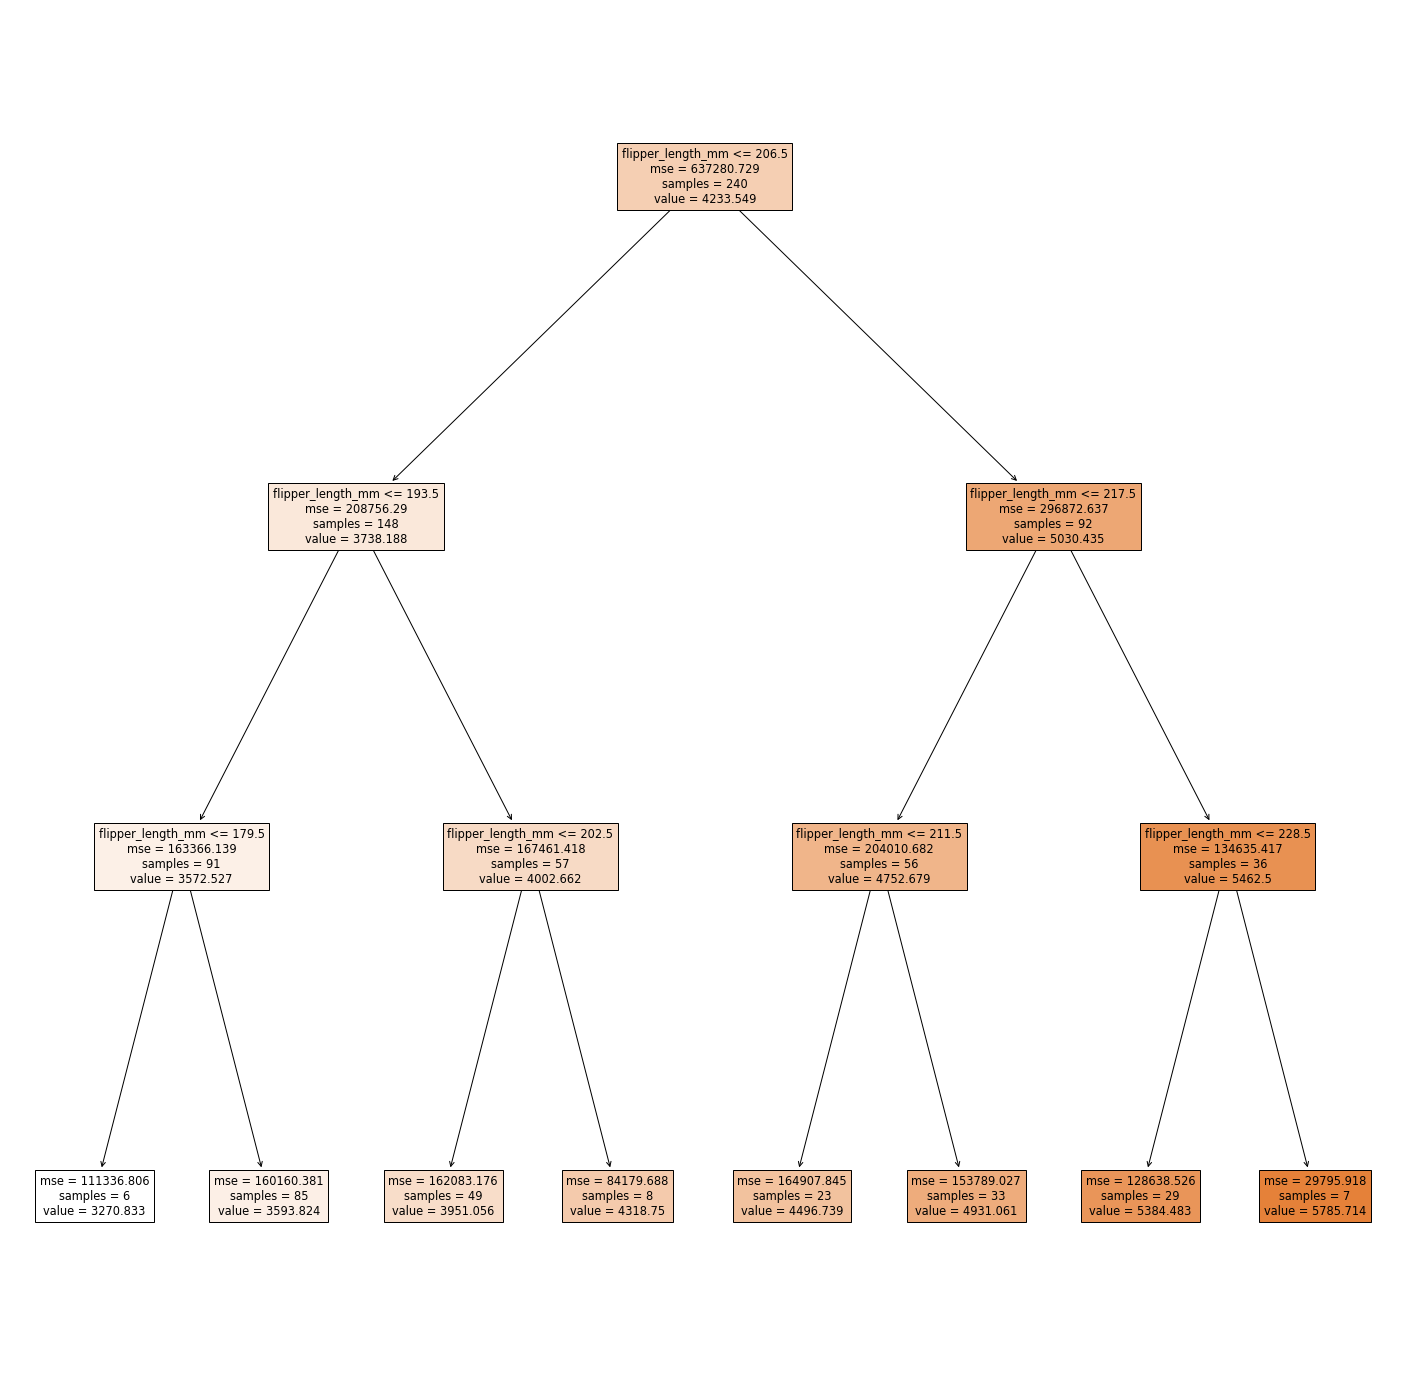

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))

plot_tree_regression(dt_regression, features)

De tree verdeelt de flipper_length_mm tot 8 waardes. MSE is de standaardafwijking, samples is hoeveel penguins en value is de waarde.